<a href="https://colab.research.google.com/github/ciepielajan/Geo_geopandas/blob/main/geopandas_sjoin%2C_geojson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`create Point from columns (Lat	Lon)  dataframe `

In [1]:
!pip -q install geopandas

     |████████████████████████████████| 1.0MB 6.8MB/s 
     |████████████████████████████████| 14.8MB 262kB/s 
     |████████████████████████████████| 6.5MB 36.9MB/s 


In [2]:
import geopandas
import pandas as pd

In [3]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
df.head()

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [7]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


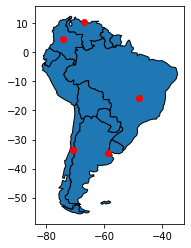

In [20]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
      # color='white',
     edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

# punkty tylko w konkretnym obszarze. 

In [1]:
!pip -q install geopandas

     |████████████████████████████████| 1.0MB 6.9MB/s 
     |████████████████████████████████| 14.8MB 298kB/s 
     |████████████████████████████████| 6.5MB 34.3MB/s 


In [2]:
!pip install rtree #<------------ niezbędne do zainstalowania dla sjoin przed importem geopandas

     |████████████████████████████████| 1.0MB 6.6MB/s 


` granice konkretnego obszaru`

In [3]:
import folium
import geopandas

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

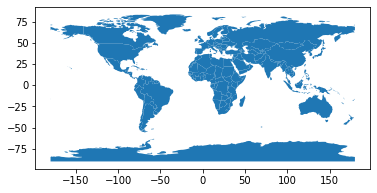

In [13]:
world.plot()

In [5]:
pol =  world[world.name == "Poland"]
pol

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
113,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."


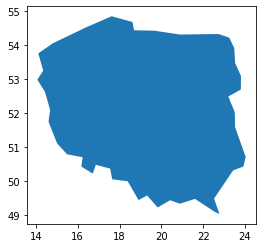

In [8]:
pol.plot()

` punkty `

In [9]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [10]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


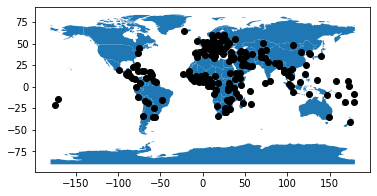

In [18]:
cities.plot(ax=world.plot(), color="black")

In [19]:
cities.crs="epsg:4326"

 pokarz punkty i granice kraju

In [20]:
m = folium.Map(location=[52 , 20], 
               tiles="cartodbpositron",
               zoom_start=5
               )

folium.GeoJson(
    pol
    ).add_to(m)

folium.GeoJson(
    cities
    ).add_to(m)

m

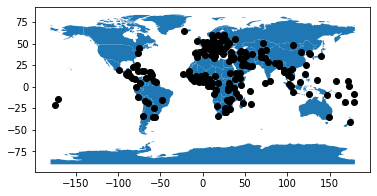

In [28]:
cities.plot(ax=world.plot(), color="black")

## pokarz punkty będące częścią kraju

In [21]:
# from geopandas.tools import sjoin
pointInPolys = geopandas.sjoin(cities, pol, op="within")
pointInPolys.head()

,name_left,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est
142,Warsaw,POINT (20.99805 52.25195),113,38476269,Europe,Poland,POL,1052000.0


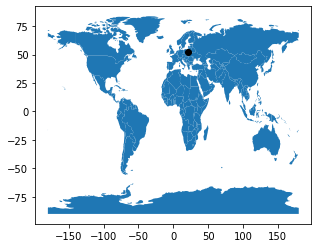

In [36]:
pointInPolys.plot(ax=world.plot(), color="black")

In [22]:
m = folium.Map(location=[52 , 20], 
               tiles="cartodbpositron",
               zoom_start=5
               )

folium.GeoJson(
    pol
    ).add_to(m)

folium.GeoJson(
    pointInPolys
    ).add_to(m)

m